In [34]:
import import_ipynb
from ETL_EDA import df
import numpy as np
import pandas as pd

In [35]:
CA_str = 'CA'
df_CA = df.query('state_code == @CA_str')[['relationships','funding_rounds','status_closed']]
df_CA

,relationships,funding_rounds,status_closed
0,3,3,0
1,9,4,0
2,5,1,0
3,5,3,0
4,2,2,1
...,...,...,...
912,10,3,0
918,9,1,0
920,5,1,1
921,12,2,0


In [36]:
df_CA['status_closed'].value_counts()

0    331
1    156
Name: status_closed, dtype: int64

In [37]:
nbins = 5
relationships, funding_rounds = df['relationships'], df['funding_rounds']
heatmap, xedges, yedges = np.histogram2d(relationships, funding_rounds, bins=nbins, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

C:\Users\aksha\anaconda3\envs\data1030\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log10



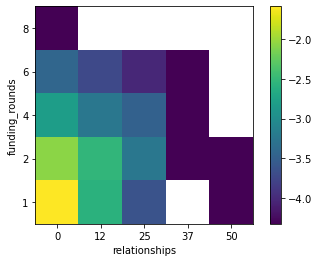

In [38]:
from matplotlib import pyplot as plt
plt.imshow(np.log10(heatmap).T, origin='lower')
plt.xlabel('relationships')
plt.ylabel('funding_rounds')
plt.xticks(np.arange(nbins)[::int(nbins/4)],xedges[::int(nbins/4)].astype(int))
plt.yticks(np.arange(nbins)[::int(nbins/4)],yedges[::int(nbins/4)].astype(int))
plt.colorbar(label='')
plt.show()

In [39]:
np.log10(heatmap).T

C:\Users\aksha\anaconda3\envs\data1030\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10



array([[-1.59120918, -2.58001128, -3.62140397,        -inf, -4.32037397],
       [-2.06752094, -2.52103342, -3.24119273, -4.32037397, -4.32037397],
       [-2.80186003, -3.24119273, -3.47527593, -4.32037397,        -inf],
       [-3.41728398, -3.71831398, -4.01934398, -4.32037397,        -inf],
       [-4.32037397,        -inf,        -inf,        -inf,        -inf]])

In [40]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(z=heatmap))
fig.show()

In [41]:
top_5 = dict((df['state_code'].value_counts())[:5])
print(top_5)

{'CA': 487, 'NY': 106, 'MA': 83, 'WA': 42, 'TX': 42}


In [42]:
(state_df)['status_closed'].value_counts()[0]/state_df.shape[0]

0.5476190476190477

In [64]:
grouped = df.groupby('state_code')
nbins = 4

top_5_dfs = []
Plots = []
heatmaps = []
success_ratios = []
for name in top_5.keys():
    state_df = grouped.get_group(name)
    top_5_dfs.append(state_df)
    relationships = state_df['relationships']
    funding_rounds = state_df['funding_rounds']
    heatmap, xedges, yedges = np.histogram2d(relationships, funding_rounds, bins=nbins, density=True) 
    fig = go.Figure(data=go.Heatmap(z=heatmap))
    Plots.append(fig)
    heatmaps.append(heatmap)
    success_ratios.append((state_df)['status_closed'].value_counts()[0]/state_df.shape[0])
    fig.show()

In [70]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='Tab one', children=[
            dcc.Graph(
                figure={
                    'data': [
                        {'x': ['CA','NY','MA','WA','TX'], 'y': success_ratios,
                            'type': 'bar', 'name': 'States'},
                    ]
                }
            )
        ]),
        dcc.Tab(label='Tab two', children=[
            dcc.Graph(
                figure={
                    'data': [
                        {'x': [1, 2, 3], 'y': [1, 4, 1],
                            'type': 'bar', 'name': 'SF'},
                        {'x': [1, 2, 3], 'y': [1, 2, 3],
                         'type': 'bar', 'name': u'Montréal'},
                    ]
                }
            )
        ]),
        dcc.Tab(label='Tab three', children=[
            dcc.Graph(
                figure={
                    'data': [
                        {'x': [1, 2, 3], 'y': [2, 4, 3],
                            'type': 'bar', 'name': 'SF'},
                        {'x': [1, 2, 3], 'y': [5, 4, 3],
                         'type': 'bar', 'name': u'Montréal'},
                    ]
                }
            )
        ]),
    ])
])

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1